# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперапрааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw1_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей а чем похожи? 

В линейной модели мы для каждого класса во время обучения ищем один паттерн (грубо говоря, "средний" объект для кажого класса), с которым в дальнейшем сравниваем объекты при тестировании - ответом будет класс, паттерн которго будет ближе всего к данному объекту.

В нейросетях мы тоже ищем паттерны, но для каждого класса паттернов мы можем делать не один, а сколько угодно. Более того, с помощью сверток мы можем выделять паттерны, которые не привязаны к конкретному месту на картинке (если при обучении линейной модели все коты были по центру картинки, то кота в углу она не найдет).

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей какая мотивация к использованию свёрточных?

В полносвязных нейросетях мы, конечно, можем выделять паттернов сколько хотим, но все же для каждого класса делать паттерны "объект в левом нижнем углу", "объект на пиксель сдвинут из левого нижнего угла" и т. д. мы не можем. Не можем из-за того, что в этом случае у нас будет очень очень много параметров и мы переобучимся. Поэтому лучше сделать свертку, которая поможет искать паттерн по всему изображению и при этом параметров сильно меньше.

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- линейное преобразование Wx + b, можно интерпретировать как вычисление скора для большого набора паттернов, очень похож на линейную алгебру и по этому работает как смена базиса (если это первый слой, то можно скзать, что мы меняем базис с яркости пикселей на "вес" паттерна в изображении).
    - ConvolutionLayer - свертка изображения с линейным фильтром. Нужен, чтобы искать паттерны не в конкретных местах, а в любом месте изображения.
    - MaxPoolLayer - разбивает матрицу на квадраты, скажем, размера 2х2 и заменяет их на к-н число, чаще всего максимум из четырех чисел в квадрате. Эта штука уменьшает изображение, усредняя его.
    - DropOut - выкидываем из полносвязного слоя случайно некоторое количество нейронов (обычно выкидываем каждый с вероятностью 0.5). 1-ая интерпретация: сможем детектировать объект, даже если не видим какие-то его части. 2-ая интерпретация: делая дропаут мы выбираем какую-то нейросеть из ансамбля нейросетей, и в итоге в среднем рез-т будет лучше (так же как с ансамблем решающих деревьев).
    - SoftMaxLayer(LossLayer) - считаем функцию потерь и градиент по ней. Очевидно, это обязательный элемент любой нейросети, так как обучаемся мы уменьшая функцию потерь, шагая по её антиградиенту.
    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

Да может, для этого нужно заменить последний слой, который считает функцию потерь и изменить механизм выдачи ответа (не argmax, а что-то вроде среднего).


**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

Потому что функция, которая получается в итоге очень сложная с множеством разных неприятных особенностей вроде "селда", из которых обычным методам сложно или даже вообще не получается. Ну и к тому же они банально медленно работают. Хорошо работает метод градиентного спуска с несколькими оптимизациями: идти по экспоненциальному среднему градиента (моментум), нормировать шаг, на сумму предыдующих (AdaGrad), делать все это вместе еще и уменьшая роль этих оптимизаций на первых итерациях, когда среднее значение еще не дает хорошего улучшения (Adam). Они работают хорошо, потому что эти методы близки к методам второго порядка.

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

Нужен, чтобы быстро и эффективно считать производные от функции потерь. Функция очень сложная и дифференцировать её в явном виде по каждому параметру практически нереально. Эффективно он считается на GPU, потому что там постоянно приходиться перемножать матрицы, а эта операция очень хорошо параллелиться, причем на большое количество вычислительных элементов.

**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно-ли ее использовать?

Кросс валидация для нейросетей работает сверх долго, так как нейросети очень долго учатся. Вместо неё просто test-and-split.

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 

<img src="conv.png" width="600">

<img src="conv answer.jpg" width="600">


-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe 
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [2]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I would use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run hw1_Modules.ipynb

Optimizer is implemented for you. 

In [22]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x, dx): 
        for cur_x, cur_dx in zip(cur_layer_x, cur_layer_dx):
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            state['old_grad'][i] = cur_old_grad
            cur_x -= cur_old_grad
            i += 1

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

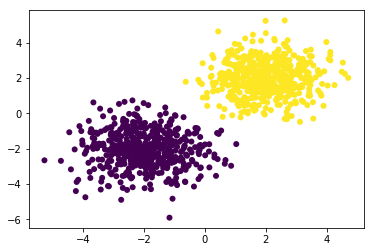

In [74]:
# Generate some data
N = 500

X1 = np.random.randn(N, 2) + np.array([2, 2])
X2 = np.random.randn(N, 2) + np.array([-2, -2])

Y = np.concatenate([np.ones(N, dtype=int), np.zeros(N, dtype=int)])[:, None]
Y = np.hstack([Y, 1 - Y])

X = np.vstack([X1, X2])
plt.scatter(X[:, 0],X[:, 1], c=Y[:, 0], edgecolors='none')

Define a **logistic regression** for debugging. 

In [75]:
# net = Sequential()
# net.add(Linear(2, 2))
# net.add(SoftMax())

criterion = ClassNLLCriterion()

# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(SoftMax())

print(net)

Linear 2 -> 4
ReLU
Linear 4 -> 2
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [77]:
# Iptimizer params
optimizer_config = {'learning_rate' : 0.001, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 5
batch_size = 1

In [3]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

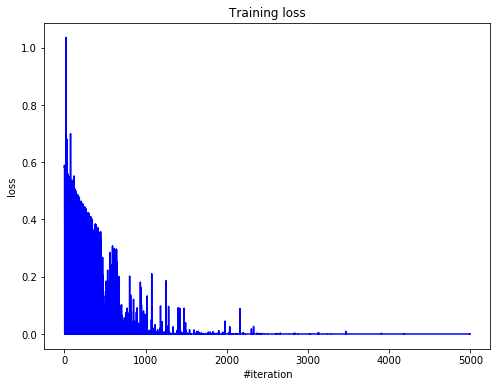

Current loss: 0.000000


In [99]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch[:, 0])
    
        # Backward
        dp = criterion.backward(predictions, y_batch[:, 0])
        net.backward(x_batch, dp)
        
        # Update weights
        gradient_step(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        
        optimizer_state['turn number'] += 1
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [4]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        Y = data['Y']
else:
    mnist = fetch_mldata("mnist-original")
    X, Y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=Y)

In [5]:
Y = Y[:, 0]

- **Compare** `ReLU`, `ELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

In [66]:
criterion = ClassNLLCriterion()

net = Sequential()
net.add(Linear(X.shape[1], 20 * X.shape[1]))
net.add(ReLU())
net.add(Linear(20 * X.shape[1], 10))
net.add(SoftMax())

print(net)

Linear 784 -> 15680
ReLU
Linear 15680 -> 10
SoftMax



In [71]:
# Iptimizer params
optimizer_config = {'learning_rate' : 0.00001, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 1
batch_size = 1

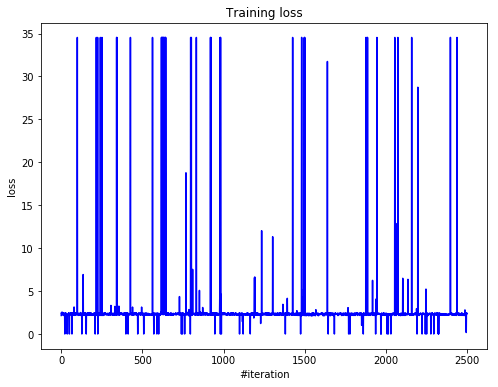

Current loss: 2.353873


In [72]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_test, y_test), batch_size):
        net.zeroGradParameters()

        #ind = np.random.randint(x_batch.shape[0], size=1)
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)  
# Your code goes here. ################################################

**Finally**, use all your knowledge to build a super cool model on this dataset, do not forget to split dataset into train and validation. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

In [6]:
def get_cur_update_state(state, config, cur_dx, calculation, name, i):
    turn_number = state.setdefault('turn number', 1)
    
    cur = state['{} moment'.format(name)].setdefault(i, np.zeros_like(cur_dx))

    np.add(config['beta {}'.format(name)] * cur,
           (1 - config['beta {}'.format(name)]) * calculation(cur_dx),
           out = cur)
    
    state['{} moment'.format(name)][i] = cur
    
    if turn_number < config['stop {} bias correction'.format(name)]:
        cur = cur / (1 - config['beta {}'.format(name)] ** turn_number)

    return cur


def gradient_step(x, dx, config, state):
    """        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    state.setdefault('first moment', {})
    state.setdefault('second moment', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x, dx): 
        for cur_x, cur_dx in zip(cur_layer_x, cur_layer_dx):
            cur_first = get_cur_update_state(state, config, cur_dx,
                                             lambda x: x, 'first', i)
            cur_second = get_cur_update_state(state, config, cur_dx,
                                              lambda x: x ** 2, 'second', i)

            cur_x -= config['learning rate'] * cur_first / (np.sqrt(cur_second) + 1e-7)
            i += 1

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/6)

In [153]:
criterion = ClassNLLCriterion()

net = Sequential()
net.add(Linear(X.shape[1], 1000))
net.add(Dropout())
net.add(ReLU())
net.add(Linear(1000, 100))
net.add(Dropout())
net.add(ReLU())
net.add(Linear(100, 10))
net.add(SoftMax())

In [154]:
# Iptimizer params
# lr in (5, 7.5)

optimizer_config = {'learning rate' : 6.25 * 1e-7, 'beta first': 0.9, 'beta second': 0.9, 'bias role': 0.05}
optimizer_config['stop first bias correction'] = (np.log(optimizer_config['bias role']) /
                                                  np.log(optimizer_config['beta first']))
optimizer_config['stop second bias correction'] = (np.log(optimizer_config['bias role']) /
                                                   np.log(optimizer_config['beta second']))

optimizer_state = {}

# Looping params
n_epoch = 5
batch_size = 1

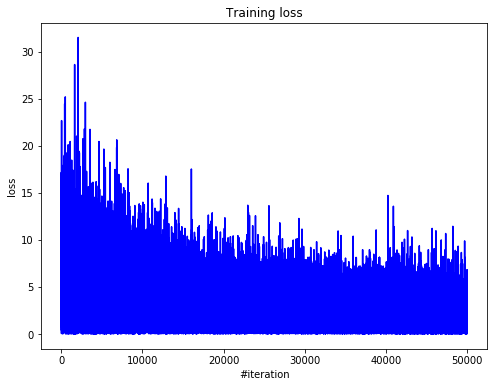

Current loss: 1.488753


In [ ]:
loss_history = []
lenght = 60000

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train[:lenght], y_train[:lenght]), batch_size):
        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        gradient_step(net.getParameters(), 
                      net.getGradParameters(), 
                      optimizer_config,
                      optimizer_state)
        
        optimizer_state['turn number'] += 1
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)  

In [151]:
predictions = net.forward(X_test)

Print here your accuracy. It should be around 90%.

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(predictions, axis=1), y_test)
# Your answer goes here. ################################################

0.40100000000000002

**Оформление дз**: заполните форму тут https://goo.gl/forms/Jx3OR5Ijjg2MwfKs2 
----------
**PS**: Напоминаем, что дедлайны жесткие, прием дз заканчивается ровно в дедлайн

# Bonus Part: Autoencoder 

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

In [11]:
# Iptimizer params
optimizer_config = {'learning rate' : 0.005, 'beta first': 0.9, 'beta second': 0.9}
optimizer_config['stop first bias correction'] = np.log(0.01) / np.log(optimizer_config['beta first'])
optimizer_config['stop second bias correction'] = np.log(0.01) / np.log(optimizer_config['beta second'])

optimizer_state = {'turn number': 1}

# Looping params
n_epoch = 10
batch_size = 600
# Your code goes here. ################################################

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

In [12]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
# Your code goes here. ################################################

# Now build a logistic regression or small classification net
cnet = Sequential()
cnet.add(Linear(30, 2))
cnet.add(SoftMax())

# Learn the weights
# Your code goes here. ################################################

# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
# Your code goes here. ################################################

# And add learned layers ontop.
autoenc.add(cnet[0])
autoenc.add(cnet[1])

# Now optimize whole model
# Your code goes here. ################################################

NameError: name 'autoenc' is not defined

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.

In [ ]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################